In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from os.path import isfile, isdir
from sklearn.model_selection import train_test_split
% matplotlib inline


In [8]:
cd C:\Users\SANYAM\Documents\mnist_dataset

C:\Users\SANYAM\Documents\mnist_dataset


In [9]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [10]:
(train.shape,test.shape)
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [11]:
df=train.copy()

In [12]:
df.head(n=6)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
np.shape(train)

(42000, 785)

In [14]:
np.shape(test)

(28000, 784)

In [15]:
unique_labels_counts=train['label'].value_counts(sort=False)
unique_labels_counts

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

In [16]:
?tf.cond()

In [17]:
# casting to numpy array
train_Data=train.values[:,1:];
train_Labels=train.values[:,0];
test_Data=test.values[:,1:];
test_Labels=test.values[:,0];
test_Data.shape
train_Data.shape

(42000, 784)

In [18]:
def preprocessing_data(data):
    '''
    min -max scaling for every image
    data : numpy array
    output : scaled numpy array
    '''
    minV=0;
    maxV=255;
    data=(data-minV)/(maxV-minV);
    return data;


In [19]:
def one_hot_encoding(data, numberOfClass):
    from sklearn import preprocessing
    lb = preprocessing.LabelBinarizer()
    lb.fit(range(numberOfClass))
    return lb.transform(data)
    

In [20]:
processedTrainData = preprocessing_data(train_Data)
processedTestData = preprocessing_data(test_Data)
one_hot_trainLabel = one_hot_encoding(train_Labels, 10);
one_hot_testLabel = one_hot_encoding(test_Labels, 10);
processedTrainData.shape

(42000, 784)

# Building Neural Network With Tensorflow

In [36]:
def initializer_parameters(features,weight_nodes,g):
    """"
    Initializes parameters to build a neural network with tensorflow
                       
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    with  g.as_default():
        W1=tf.get_variable("W1",initializer = tf.contrib.layers.xavier_initializer(seed = 1),shape=(features,weight_nodes[0]));
        W2=tf.get_variable("W2",initializer = tf.contrib.layers.xavier_initializer(seed = 1),shape=(weight_nodes[0],weight_nodes[1]));
        W3=tf.get_variable("W3",initializer = tf.contrib.layers.xavier_initializer(seed = 1),shape=(weight_nodes[1],weight_nodes[2]));
        b1 = tf.get_variable("b1", shape=(1,weight_nodes[0]), initializer = tf.zeros_initializer());
        b2 = tf.get_variable("b2", shape=(1,weight_nodes[1]), initializer = tf.zeros_initializer())
        b3 = tf.get_variable("b3", shape=(1,weight_nodes[2]), initializer = tf.zeros_initializer());
        parameters1={};
        parameters1["W1"]=W1;
        parameters1["W2"]=W2;
        parameters1["W3"]=W3;
        parameters1["b1"]=b1;
        parameters1["b2"]=b2;
        parameters1["b3"]=b3;
    return parameters1

In [22]:
def create_placeholder(features,classes,g):
    """"
    Creates the placeholders for the tensorflow session.
  
    
    Returns:
    X -- placeholder for the data input, of shape [None, features] and dtype "float"
    Y -- placeholder for the input labels, of shape [None,classes] and dtype "float""
    """
    with g.as_default():
        X1 = tf.placeholder(dtype=tf.float32,shape=(None,features));
        Y1= tf.placeholder(dtype=tf.float32,shape=(None,classes));
        keep_prob = tf.placeholder(dtype = tf.float32,name="keep_prob");
        l2_regulization=tf.placeholder(dtype=tf.int32,name="l2");
    return X1,Y1,keep_prob,l2_regulization

In [23]:
def forward_propogation(parameters,X,g,keep_prob):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR 
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing  parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters
    g --current graph
    keep_prob -- placeholder for keep_probability
    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    with g.as_default(): 
        W1=parameters["W1"];
        W2=parameters["W2"];
        W3=parameters["W3"];
        b1=parameters["b1"];
        b2=parameters["b2"];
        b3=parameters["b3"];
     # 1 layer
        Z1=tf.add(tf.matmul(X,W1),b1);
        A1=tf.nn.relu(Z1);
        A1_drop=tf.nn.dropout(A1,keep_prob);
     # 2 layer
        Z2=tf.add(tf.matmul(A1_drop,W2),b2);
        A2=tf.nn.relu(Z2);
        A2_drop=tf.nn.dropout(A2,keep_prob);
     # 3 layer
        Z3=tf.add(tf.matmul(A2_drop,W3),b3);
    return Z3;

In [72]:
def printResult(epoch,numberOfEpoch,trainLoss,validationLoss,validationAccuracy,g,train_accuracy):
    with g.as_default():
        print("Epoch: {}/{}".format(epoch+1, numberOfEpoch),
         '\tTraining Loss: {:.3f}'.format(trainLoss),
          '\t Training_Accuracy{:.3f}%'.format(train_accuracy*100),    
         '\tValidation Loss: {:.3f}'.format(validationLoss),
         '\tVal_Accuracy: {:.2f}%'.format(validationAccuracy*100))
          

In [73]:
def compute_cost(Z3,Y,g):
    """
     Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (10, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    with g.as_default():  
        logits = Z3;
        labels = Y;
        cost1 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits =logits, labels = labels));
   
    
    return cost1

In [74]:
# Build Neural Network graph
def model1(lambd,g,learning_rate_value,weight_nodes):
    
    with g.as_default():
        numberOfClass = 10
        imageSize = (28, 28)
        features = np.prod(imageSize)
        Input_Data,Input_Labels,keep_prob,l2_regulization=create_placeholder(features,numberOfClass,g); 
    # Placeolder for input data
        parameters=initializer_parameters(features,weight_nodes,g); 
    # forward propogating
        Z3=forward_propogation(parameters,Input_Data,g,keep_prob);
    # computing the cost
               
        cost1=compute_cost(Z3,Input_Labels,g);
        Total_l2_loss=(tf.nn.l2_loss(parameters["W1"])+ tf.nn.l2_loss(parameters["W2"])+tf.nn.l2_loss(parameters["W3"]));
        cost=tf.cond(l2_regulization>0,lambda : tf.reduce_mean(cost1+(lambd*Total_l2_loss)),lambda: cost1 );
    # probability of outputs
        probability=tf.nn.softmax(Z3);
    # optimizer
        optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate_value).minimize(cost)
    # accuracy
        correct_prediction=tf.equal(tf.argmax(probability,axis=1),tf.argmax(Input_Labels,axis=1));
        accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32));
    
    return accuracy,optimizer,cost,keep_prob,l2_regulization,Input_Data,Input_Labels
    

# Training the model

In [334]:
from tensorflow.python.framework import ops

In [76]:
def nn_model(learning_rate_value,l2_regulaizer,batch_size_value,num_epoches,keep_prob_rate,lambd):
    num_layers=3
    num_of_nodes=[30,30,10];
    Learning_rate=learning_rate_value;
    batch_size=batch_size_value;
    num_of_epoches=num_epoches;
    save_dir = 'C:/Users/SANYAM/Documents/mnist_dataset./save'
    graph1 = tf.Graph()
    accuracy,optimizer,cost,keep_prob,l2_regulization,Input_Data,Input_Labels=model1(lambd,graph1,\
                                                                                     learning_rate_value,num_of_nodes);
    with tf.Session(graph=graph1) as sess:
        sess.run(tf.global_variables_initializer())
        Total_cost=[];
        
        for epoch in range(num_of_epoches):
        # training data & validation data
            train_x, val_x, train_y, val_y = train_test_split(processedTrainData,one_hot_trainLabel,test_size = 0.3) ;
            num_of_example=train_x.shape[0];
            n1=(num_of_example/batch_size);
        # training loss
            epoche_num=0;
            for i in range(0,num_of_example, batch_size):
                       
                if (i+batch_size)>num_of_example:   
                    trainLoss, _ ,train_accuracy= sess.run([cost, optimizer,accuracy], feed_dict = {
                Input_Data: train_x[i:num_of_example],
                Input_Labels:train_y[i: num_of_example],
                keep_prob:keep_prob_rate,
                l2_regulization:l2_regulaizer     
                })
                else:
                    trainLoss, _= sess.run([cost, optimizer], feed_dict = {
                Input_Data:  train_x[i: i+batch_size],
                Input_Labels: train_y[i: i+batch_size],
                 keep_prob:keep_prob_rate,
                l2_regulization:l2_regulaizer     
                })
                epoche_num+=(trainLoss/n1);
            
        # validation loss
            valAcc, valLoss = sess.run([accuracy, cost], feed_dict ={
            Input_Data: val_x,
            Input_Labels: val_y,
             keep_prob:keep_prob_rate,
                l2_regulization:l2_regulaizer  
        })
            Total_cost.append(epoche_num);
        
        
        # print out
            printResult(epoch, num_of_epoches, trainLoss, valLoss, valAcc,graph1,train_accuracy)
        # plotting the graph
        plt.plot(np.squeeze(Total_cost));
        plt.ylabel('cost');
        plt.xlabel('iterations ');
        plt.title("learning_rate"+str(Learning_rate));
    
        # save
        saver = tf.train.Saver()
        saver.save(sess, save_dir)

Epoch: 1/30 	Training Loss: 0.224 	 Training_Accuracy93.182% 	Validation Loss: 0.216 	Val_Accuracy: 93.44%
Epoch: 2/30 	Training Loss: 0.204 	 Training_Accuracy92.045% 	Validation Loss: 0.188 	Val_Accuracy: 94.21%
Epoch: 3/30 	Training Loss: 0.130 	 Training_Accuracy95.455% 	Validation Loss: 0.153 	Val_Accuracy: 95.21%
Epoch: 4/30 	Training Loss: 0.239 	 Training_Accuracy89.773% 	Validation Loss: 0.144 	Val_Accuracy: 95.44%
Epoch: 5/30 	Training Loss: 0.137 	 Training_Accuracy95.455% 	Validation Loss: 0.134 	Val_Accuracy: 95.86%
Epoch: 6/30 	Training Loss: 0.168 	 Training_Accuracy94.318% 	Validation Loss: 0.113 	Val_Accuracy: 96.40%
Epoch: 7/30 	Training Loss: 0.208 	 Training_Accuracy93.182% 	Validation Loss: 0.117 	Val_Accuracy: 96.40%
Epoch: 8/30 	Training Loss: 0.128 	 Training_Accuracy97.727% 	Validation Loss: 0.109 	Val_Accuracy: 96.64%
Epoch: 9/30 	Training Loss: 0.143 	 Training_Accuracy96.591% 	Validation Loss: 0.131 	Val_Accuracy: 96.04%
Epoch: 10/30 	Training Loss: 0.021 	 

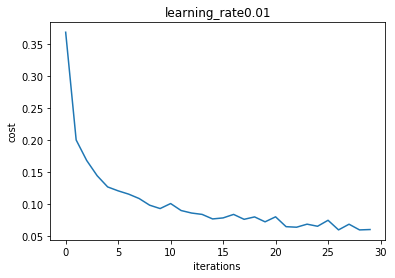

In [77]:
nn_model(learning_rate_value=0.01,l2_regulaizer=False,batch_size_value=128,num_epoches=30,keep_prob_rate = 1.0,lambd=0.0)


In [80]:
a=tf.constant([1,2,3,4],shape=(1,4));
b=tf.constant([1,2,3,4],shape=(4,1));
c=tf.matmul(a,b);
sess=tf.Session(config=tf.ConfigProto(log_device_placement=True))
print(sess.run(c));

[[30]]
